In [18]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from scipy.stats import mannwhitneyu
from sklearn import svm
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df['Time'] = round(df['Time'] / 3600)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,48.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,48.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,48.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,48.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
inliers = df[df['Class']==0]
outliers = df[df['Class']==1]
columns = df.drop('Class', axis=1).columns

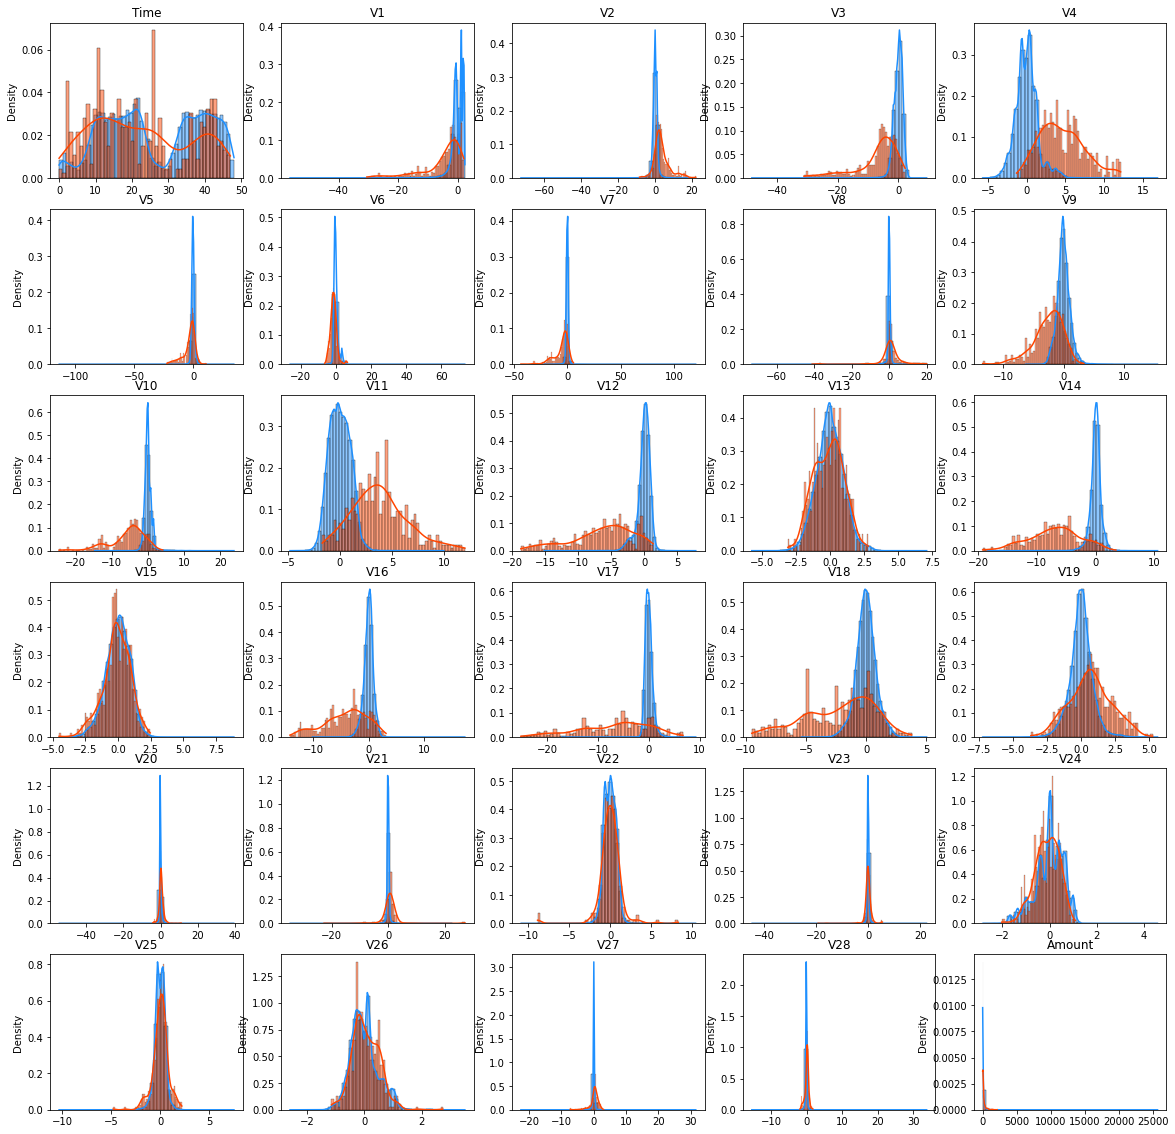

In [22]:
grid = gridspec.GridSpec(6, 5)
plt.figure(figsize=(20, 20))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.histplot(inliers[col], bins=50, color='dodgerblue',
                 stat='density', kde=True)
    sns.histplot(outliers[col], bins=50, color='orangered',
                 stat='density', kde=True)
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

In [23]:
columns_sig = [i for i in columns
               if mannwhitneyu(inliers[i], outliers[i])[1] < 0.001]
df_sig = df[columns_sig]
df_sig

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16,V17,V18,V19,V20,V21,V24,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.066928,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,-0.008983,0.014724,2.69
2,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.055353,-0.059752,378.66
3,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,0.062723,0.061458,123.50
4,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,48.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,-0.509348,0.943651,0.823731,0.77
284803,48.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,-1.016226,0.068472,-0.053527,24.79
284804,48.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.640134,0.004455,-0.026561,67.88
284805,48.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.123205,0.108821,0.104533,10.00


In [24]:
import random
random.seed(42)
sample_idx = random.sample(list(inliers.index), len(outliers))

In [25]:
inliers_sig_train = df_sig.loc[inliers.index.drop(sample_idx)]
inliers_sig_test = df_sig.loc[sample_idx]
outliers_sig = df_sig.loc[outliers.index]
test = inliers_sig_test.append(outliers_sig)

In [26]:
inliers_sig_train.shape, test.shape

((283823, 24), (984, 24))

In [27]:
k = 20
cont = len(outliers)/len(inliers) if len(outliers)/len(inliers) > 0.1 else 0.1
lof = LocalOutlierFactor(n_neighbors=k, contamination=cont, novelty=True, n_jobs=-1)
lof.fit(inliers_sig_train)

LocalOutlierFactor(contamination=0.1, n_jobs=-1, novelty=True)

In [28]:
pred_lof = lof.predict(test)
ground_truth = df['Class'][test.index].replace({0: 1, 1: -1})
print(confusion_matrix(ground_truth, pred_lof))
print(classification_report(ground_truth, pred_lof))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


[[418  74]
 [ 61 431]]
              precision    recall  f1-score   support

          -1       0.87      0.85      0.86       492
           1       0.85      0.88      0.86       492

    accuracy                           0.86       984
   macro avg       0.86      0.86      0.86       984
weighted avg       0.86      0.86      0.86       984



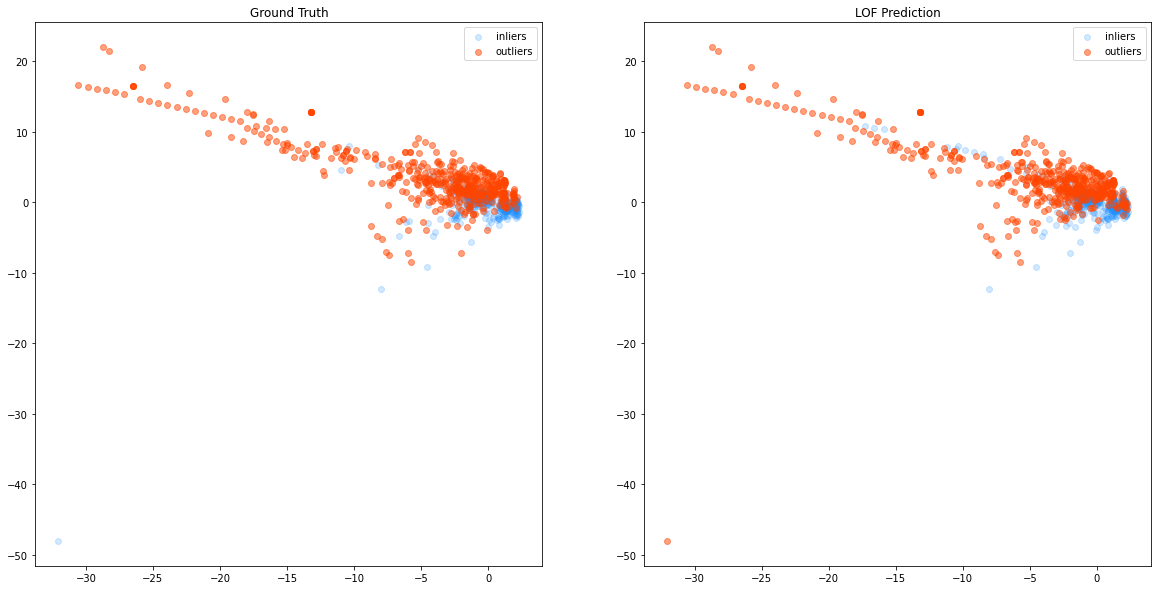

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


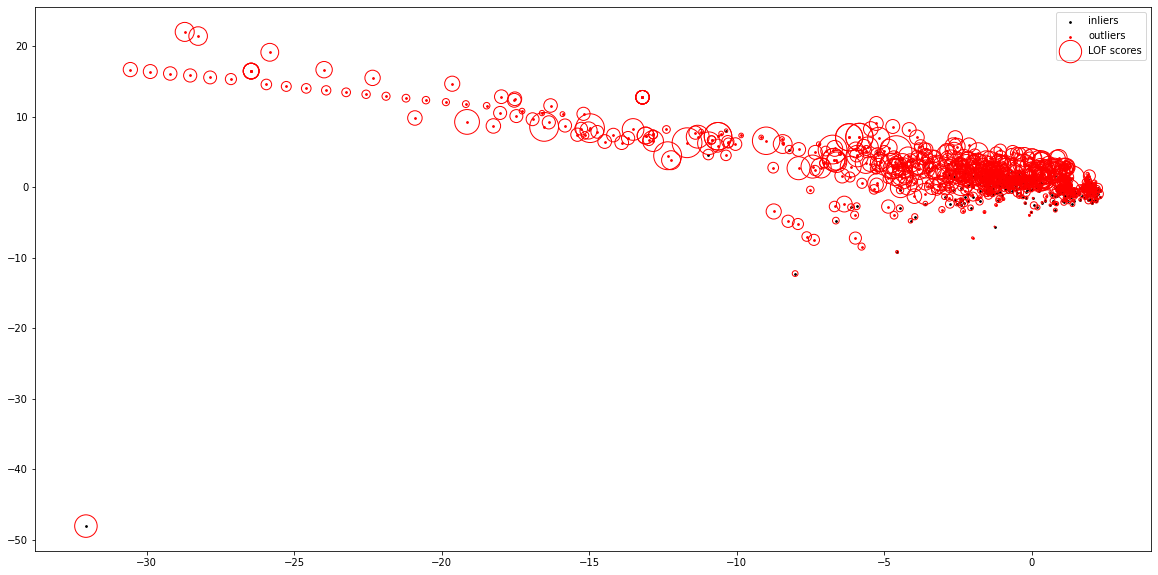

In [29]:
grid = gridspec.GridSpec(1, 2)
plt.figure(figsize=(20, 10))

ax0 = plt.subplot(grid[0])
plt.title('Ground Truth')
plt.scatter(inliers_sig_test['V1'], inliers_sig_test['V2'], color='dodgerblue', alpha=0.2)
plt.scatter(outliers_sig['V1'], outliers_sig['V2'], color='orangered', alpha=0.5)
plt.legend(['inliers', 'outliers'])

ax1 = plt.subplot(grid[1])
plt.title('LOF Prediction')
plt.scatter(test['V1'].iloc[np.where(pred_lof == 1)], test['V2'].iloc[np.where(pred_lof == 1)], color='dodgerblue', alpha=0.2)
plt.scatter(test['V1'].iloc[np.where(pred_lof == -1)], test['V2'].iloc[np.where(pred_lof == -1)], color='orangered', alpha=0.5)
plt.legend(['inliers', 'outliers'])
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(inliers_sig_test['V1'], inliers_sig_test['V2'], color='k', s=3.)
plt.scatter(outliers_sig['V1'], outliers_sig['V2'], color='r', s=3.)
LOF_scores = lof.score_samples(test)
radius = (LOF_scores.max() - LOF_scores)/(LOF_scores.max() - LOF_scores.min())
plt.scatter(test['V1'], test['V2'],
            s=1000*radius,
            alpha=1,
            edgecolors='r',
            facecolors='none', 
            label='LOF scores')
plt.legend(['inliers', 'outliers', 'LOF scores'])
plt.show()

In [30]:
IF = IsolationForest(n_estimators=100, contamination=0.2, random_state=42, n_jobs=-1)
IF.fit(inliers_sig_train)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.2, n_jobs=-1, random_state=42)

In [31]:
print('Fraction predicted as outliers:',
      round((IF.predict(outliers_sig) == -1).sum() / len(outliers), 2))

Fraction predicted as outliers: 0.92


In [32]:
pred_IF = IF.predict(test)
print(confusion_matrix(ground_truth, pred_IF))
print(classification_report(ground_truth, pred_IF))

[[451  41]
 [107 385]]
              precision    recall  f1-score   support

          -1       0.81      0.92      0.86       492
           1       0.90      0.78      0.84       492

    accuracy                           0.85       984
   macro avg       0.86      0.85      0.85       984
weighted avg       0.86      0.85      0.85       984



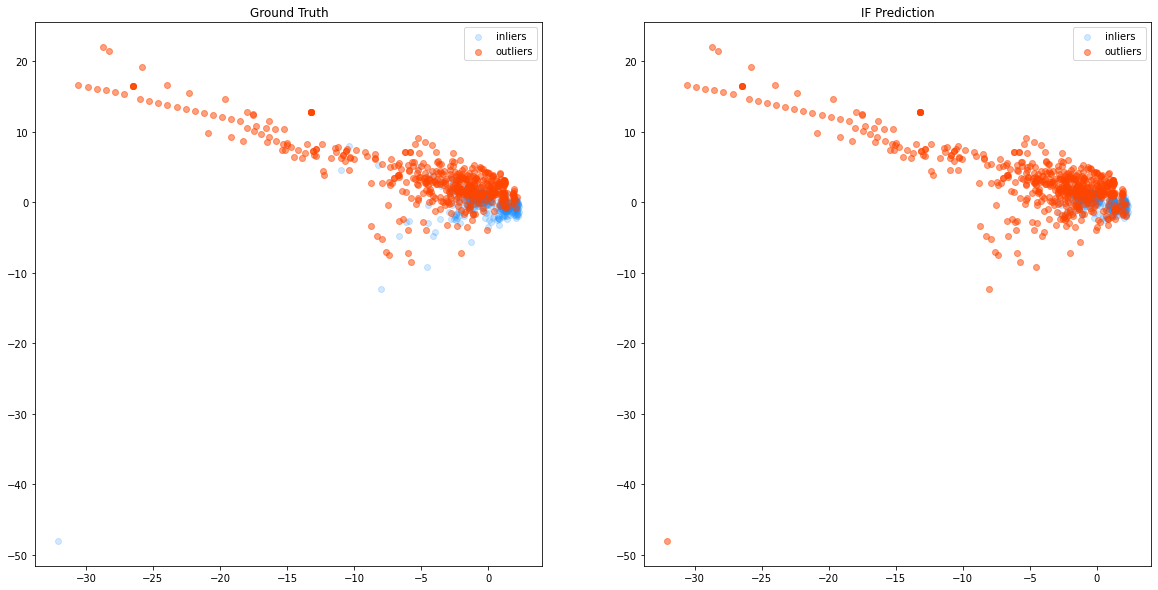

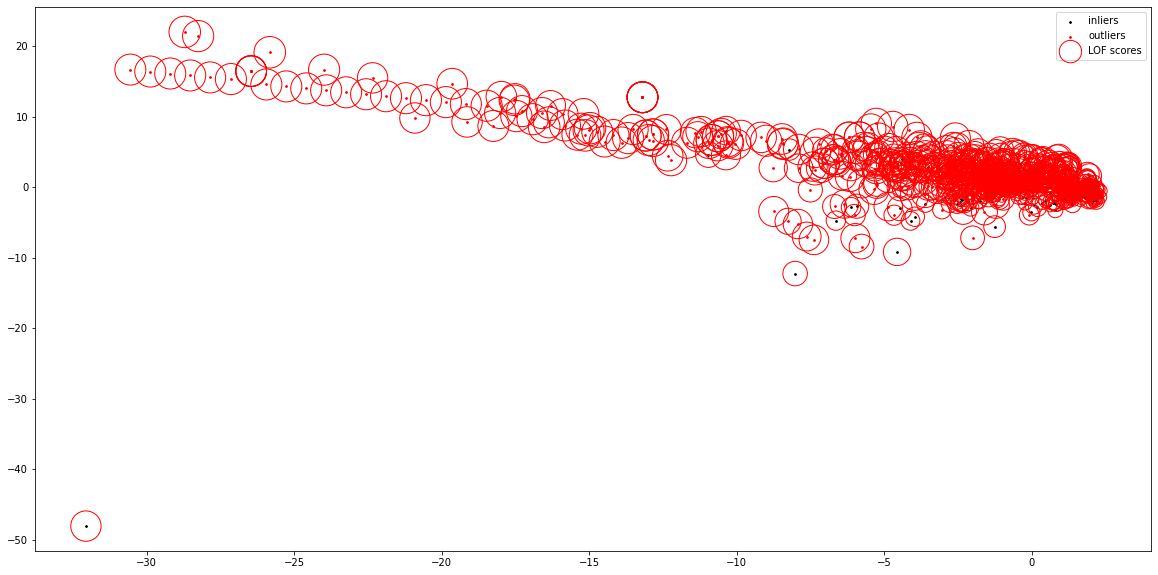

In [33]:
grid = gridspec.GridSpec(1, 2)
plt.figure(figsize=(20, 10))

ax0 = plt.subplot(grid[0])
plt.title('Ground Truth')
plt.scatter(inliers_sig_test['V1'], inliers_sig_test['V2'], color='dodgerblue', alpha=0.2)
plt.scatter(outliers_sig['V1'], outliers_sig['V2'], color='orangered', alpha=0.5)
plt.legend(['inliers', 'outliers'])

ax1 = plt.subplot(grid[1])
plt.title('IF Prediction')
plt.scatter(test['V1'].iloc[np.where(pred_IF == 1)], test['V2'].iloc[np.where(pred_IF == 1)], color='dodgerblue', alpha=0.2)
plt.scatter(test['V1'].iloc[np.where(pred_IF == -1)], test['V2'].iloc[np.where(pred_IF == -1)], color='orangered', alpha=0.5)
plt.legend(['inliers', 'outliers'])
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(inliers_sig_test['V1'], inliers_sig_test['V2'], color='k', s=3.)
plt.scatter(outliers_sig['V1'], outliers_sig['V2'], color='r', s=3.)
IF_scores = IF.score_samples(test)
radius = (IF_scores.max() - IF_scores)/(IF_scores.max() - IF_scores.min())
plt.scatter(test['V1'], test['V2'],
            s=1000*radius,
            alpha=1,
            edgecolors='r',
            facecolors='none', 
            label='IF scores')
plt.legend(['inliers', 'outliers', 'LOF scores'])
plt.show()

In [34]:
svm_ = svm.OneClassSVM(nu=0.001, kernel='rbf')
svm_.fit(inliers_sig_train)

OneClassSVM(nu=0.001)

In [35]:
print('Fraction predicted as outliers:',
      round((svm_.predict(outliers_sig) == -1).sum() / len(outliers), 2))

Fraction predicted as outliers: 0.12


In [36]:
pred_svm = svm_.predict(test)
print(confusion_matrix(ground_truth, pred_svm))
print(classification_report(ground_truth, pred_svm))

[[ 59 433]
 [  2 490]]
              precision    recall  f1-score   support

          -1       0.97      0.12      0.21       492
           1       0.53      1.00      0.69       492

    accuracy                           0.56       984
   macro avg       0.75      0.56      0.45       984
weighted avg       0.75      0.56      0.45       984



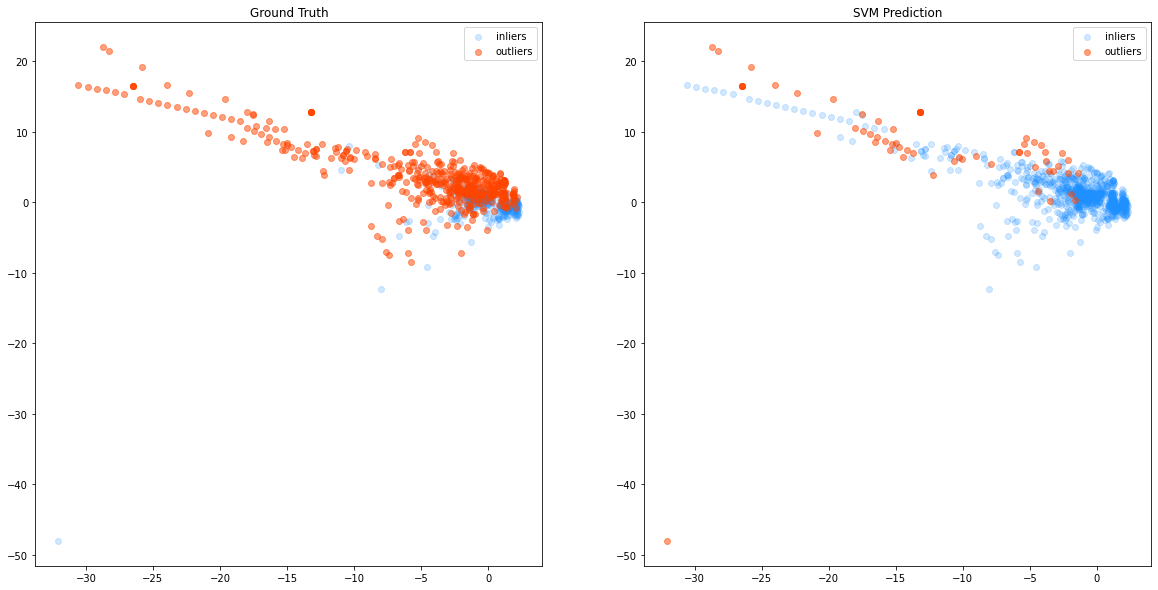

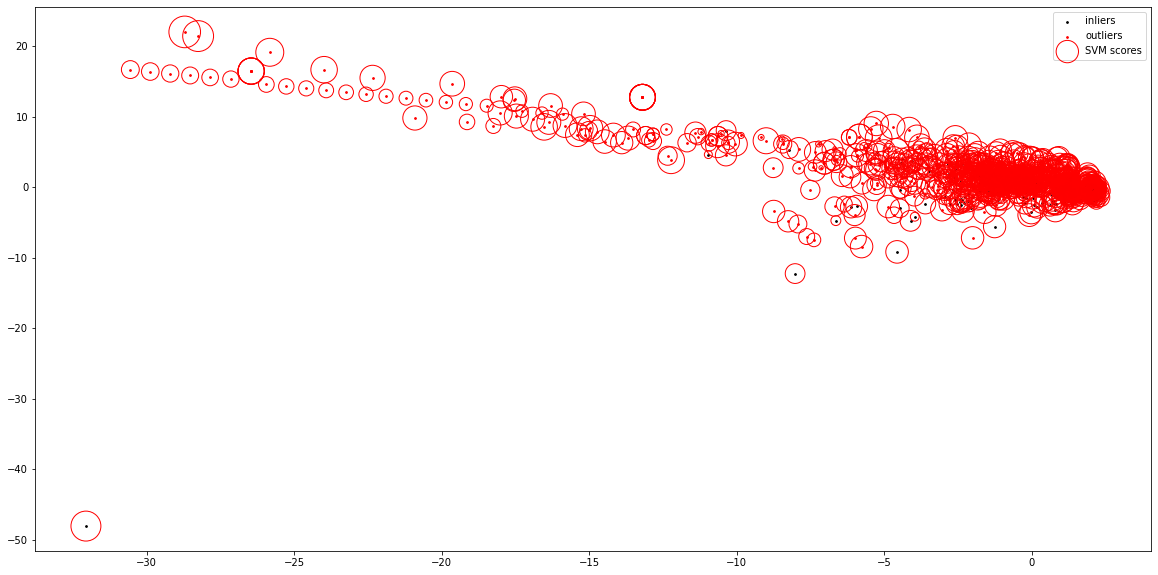

In [37]:
grid = gridspec.GridSpec(1, 2)
plt.figure(figsize=(20, 10))

ax0 = plt.subplot(grid[0])
plt.title('Ground Truth')
plt.scatter(inliers_sig_test['V1'], inliers_sig_test['V2'], color='dodgerblue', alpha=0.2)
plt.scatter(outliers_sig['V1'], outliers_sig['V2'], color='orangered', alpha=0.5)
plt.legend(['inliers', 'outliers'])

ax1 = plt.subplot(grid[1])
plt.title('SVM Prediction')
plt.scatter(test['V1'].iloc[np.where(pred_svm == 1)], test['V2'].iloc[np.where(pred_svm == 1)], color='dodgerblue', alpha=0.2)
plt.scatter(test['V1'].iloc[np.where(pred_svm == -1)], test['V2'].iloc[np.where(pred_svm == -1)], color='orangered', alpha=0.5)
plt.legend(['inliers', 'outliers'])
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(inliers_sig_test['V1'], inliers_sig_test['V2'], color='k', s=3.)
plt.scatter(outliers_sig['V1'], outliers_sig['V2'], color='r', s=3.)
svm_scores = svm_.score_samples(test)
radius = (svm_scores.max() - svm_scores)/(svm_scores.max() - svm_scores.min())
plt.scatter(test['V1'], test['V2'],
            s=1000*radius,
            alpha=1,
            edgecolors='r',
            facecolors='none', 
            label='SVM scores')
plt.legend(['inliers', 'outliers', 'SVM scores'])
plt.show()

In [38]:
comb = np.vectorize({2: 1, 0: -1, -2: -1}.get)(pred_lof + pred_IF)
print(confusion_matrix(ground_truth, comb))
print(classification_report(ground_truth, comb))

[[462  30]
 [136 356]]
              precision    recall  f1-score   support

          -1       0.77      0.94      0.85       492
           1       0.92      0.72      0.81       492

    accuracy                           0.83       984
   macro avg       0.85      0.83      0.83       984
weighted avg       0.85      0.83      0.83       984



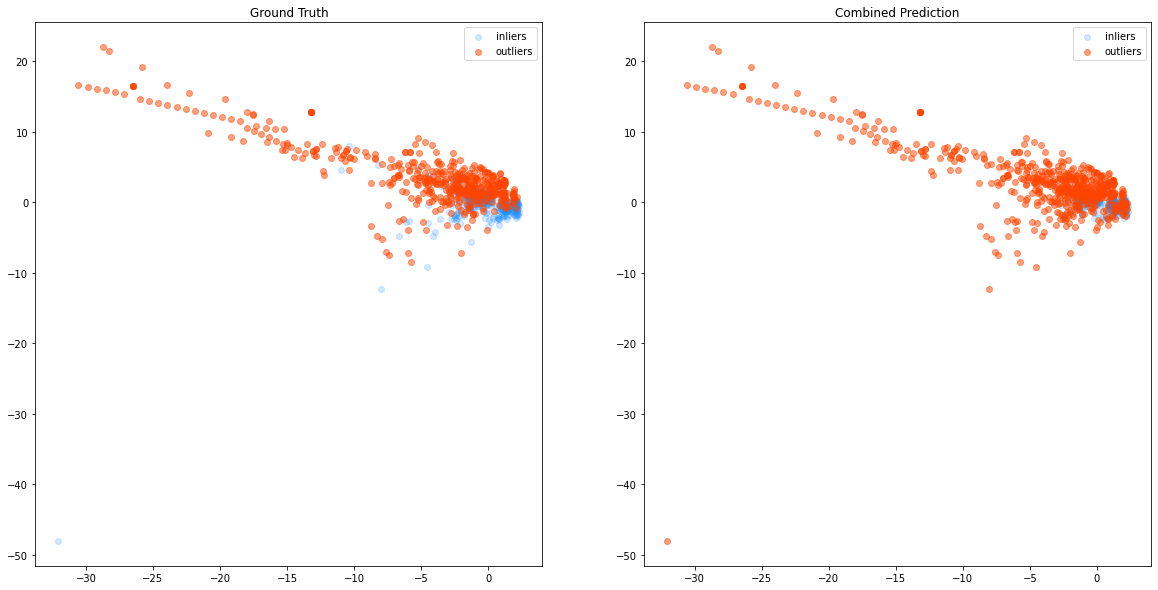

In [39]:
grid = gridspec.GridSpec(1, 2)
plt.figure(figsize=(20, 10))

ax0 = plt.subplot(grid[0])
plt.title('Ground Truth')
plt.scatter(inliers_sig_test['V1'], inliers_sig_test['V2'], color='dodgerblue', alpha=0.2)
plt.scatter(outliers_sig['V1'], outliers_sig['V2'], color='orangered', alpha=0.5)
plt.legend(['inliers', 'outliers'])

ax1 = plt.subplot(grid[1])
plt.title('Combined Prediction')
plt.scatter(test['V1'].iloc[np.where(comb == 1)], test['V2'].iloc[np.where(comb == 1)], color='dodgerblue', alpha=0.2)
plt.scatter(test['V1'].iloc[np.where(comb == -1)], test['V2'].iloc[np.where(comb == -1)], color='orangered', alpha=0.5)
plt.legend(['inliers', 'outliers'])
plt.show()

In [40]:
print('PCC:', 1.25*2*((len(outliers) / len(test))**2))

PCC: 0.625
